<a href="https://colab.research.google.com/github/Rohanrathod7/my-ds-labs/blob/main/10_Min_Project/03_Visualizing_The_History_of_Nobel_Price_Winner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyze Nobel Prize winner data and identify patterns by answering the following questions:

### What is the most commonly awarded gender and birth country?

- Store your answers as string variables top_gender and top_country.

**Q1 Load the dataset and find the most common gender and birth country
Load the dataset into a DataFrame using pandas and then extract the top values from sex and birth_country.**


- Load in data
- Use the pandas read_csv() function to load the data as a DataFrame.

- Most common value in a column
- Use value_counts() on the desired column and tag .index[0] to the end to grab only the top value.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [7]:
url = "https://raw.githubusercontent.com/Rohanrathod7/my-ds-labs/main/10_Min_Project/database/nobel.csv"
df = pd.read_csv(url)
display(df.head())

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [8]:
top_gender = df["sex"].value_counts().index[0]
top_country = df["birth_country"].value_counts().index[0]
print(top_gender)
print(top_country)

Male
United States of America


**Q2 Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?**

- Store this as an integer called max_decade_usa.

**Identify the decade with the highest ratio of US-born winners
To calculate the ratio, first create a column that creates a flag for winners whose birth country is "United States of America", then create a decade column, and use both to find the ratio.**


1. Create the US-born winners column
- Use the following syntax to create a new column based on information in an - - existing column: df['col_name'] = df['col_name'] == 'France'



2. Create the decade column
- Each year value in the decade column should end with 0. Divide the year values by 10 and wrap this in np.floor().
- You'll then need to multiply by 10 to get the four-digit year value and set the type as int using .astype().



3. Finding the ratio
- Use groupby() to group by decade, then use .mean() on the US-born winner - - - column. By setting as_index=False, you make sure the result is saved as a - - - DataFrame rather than a series.


4. Identify the decade with the highest ratio of US-born winners
- Using the DataFrame with the US-born winner ratio, find the row that has the highest ratio by filtering the DataFrame to find the row with the .max() ratio value.
- To save only the decade value, add ['decade'] and .values[0] to the filter and save this to max_decade_usa.



5. Create a relational line plot
- This step is optional. Use the relplot() function from seaborn, with the kind parameter equal to "line"; fill in the appropriate x, y, and data parameters.

In [9]:
df["US-born"] = df["birth_country"] == "United States of America"
print(df["US-born"])

0      False
1      False
2      False
3      False
4      False
       ...  
994    False
995     True
996    False
997    False
998    False
Name: US-born, Length: 999, dtype: bool


In [16]:
df["decade"] = (np.floor(df["year"] / 10) * 10).astype(int)
print(df["decade"])
us_born_by_decade = df.groupby("decade", as_index=False)["US-born"].mean()
us_born_by_decade.rename(columns={"US-born": "mean_us_born"}, inplace=True)
print(us_born_by_decade)

0      1900
1      1900
2      1900
3      1900
4      1900
       ... 
994    2020
995    2020
996    2020
997    2020
998    2020
Name: decade, Length: 999, dtype: int64
    decade  mean_us_born
0     1900      0.017544
1     1910      0.075000
2     1920      0.074074
3     1930      0.250000
4     1940      0.302326
5     1950      0.291667
6     1960      0.265823
7     1970      0.317308
8     1980      0.319588
9     1990      0.403846
10    2000      0.422764
11    2010      0.314050
12    2020      0.346939


In [19]:
max_mean_value = us_born_by_decade["mean_us_born"].max()
max_decade_usa = us_born_by_decade[us_born_by_decade["mean_us_born"] == max_mean_value]
max_decade_usa=max_decade_usa["decade"].values[0]
print(max_decade_usa)

2000


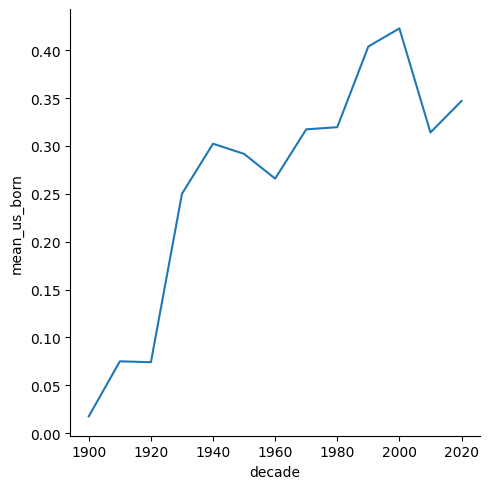

In [20]:
sns.relplot(x="decade", y="mean_us_born", data=us_born_by_decade, kind="line")
plt.show()

**Q3 Which decade and Nobel Prize category combination had the highest proportion of female laureates?**

- Store this as a dictionary called max_female_dict where the decade is the key and the category is the value. There should only be one key:value pair.

**Find the decade and category with the highest proportion of female laureates
You can copy and modify your code from the previous tasks to create a DataFrame for the proportion of female winners, then create a dictionary called max_female_dict with the year and category pair with the most female winners.**


1. Filtering for female winners
- Add a column where the value is True when sex is "Female".


2. Group by two columns
- Use groupby() to group by both decade and category, then isolate the female_winner column and take the mean(). Use as_index=False to save the result as a DataFrame.


3. Find the decade and category with the highest female winners
- Using the new DataFrame with the means of female winners, find the row that has the highest mean by filtering the DataFrame to find the row with the .max() mean value.
- To save the decade and category values, add ['decade', 'category'] to the filter.


4. Create a dictionary
- Use the curly braces syntax to create a dictionary and apply .values[0] to extract the decade and category from the values you just saved. It should look something like this: {df['col1'].values[0]: df['col2'].values[0]}


5. Create a relational line plot with multiple categories
- This step is optional: Use the same plotting code as the previous task and add the hue parameter, mapping it to the category variable.

In [21]:
df["Female"] = df["sex"] == "Female"
df["Female"]

,Female
0,False
1,False
2,False
3,False
4,False
...,...
994,False
995,False
996,False
997,False


In [23]:
female_winner = df.groupby(["decade", "category"], as_index=False)["Female"].mean()
print(female_winner)

    decade    category    Female
0     1900   Chemistry  0.000000
1     1900  Literature  0.100000
2     1900    Medicine  0.000000
3     1900       Peace  0.071429
4     1900     Physics  0.076923
..     ...         ...       ...
67    2020   Economics  0.000000
68    2020  Literature  0.500000
69    2020    Medicine  0.125000
70    2020       Peace  0.285714
71    2020     Physics  0.166667

[72 rows x 3 columns]


In [24]:
max_female_value = female_winner["Female"].max()
max_female = female_winner[female_winner["Female"] == max_female_value]
print(max_female)

    decade    category  Female
68    2020  Literature     0.5


In [25]:
max_female_dict = {max_female["decade"].values[0]:
                 max_female["category"].values[0]}
print(max_female_dict)

{np.int64(2020): 'Literature'}


**Q4 Who was the first woman to receive a Nobel Prize, and in what category?**

- Save your string answers as first_woman_name and first_woman_category.

**Find first woman to win a Nobel Prize**
1. Filter the DataFrame for the rows with Female winners and find the earliest - year and corresponding category in this subset.


2. Filter a DataFrame
- Use the female winner column you created and filter the DataFrame with the following syntax: new_df = df[df['col']]


3. Find the minimum value in a column
- To find the lowest value in a particular column, you can use: min_row = df[df['col'] == df['col_'].min()].

In [26]:
winner_female = df[df["Female"]]
print(winner_female["full_name"])

19                           Marie Curie, née Sklodowska
29     Baroness Bertha Sophie Felicita von Suttner, n...
51                         Selma Ottilia Lovisa Lagerlöf
62                           Marie Curie, née Sklodowska
128                                       Grazia Deledda
                             ...                        
980                                     Carolyn Bertozzi
982                                         Annie Ernaux
989                                       Katalin Karikó
993                                      Anne L’Huillier
998                                     Narges Mohammadi
Name: full_name, Length: 64, dtype: object


In [28]:
first_woman = winner_female["year"].min()
first_woman = winner_female[winner_female["year"]==first_woman]
print(first_woman)

    year category                            prize  \
19  1903  Physics  The Nobel Prize in Physics 1903   

                                           motivation prize_share  \
19  "in recognition of the extraordinary services ...         1/4   

    laureate_id laureate_type                    full_name  birth_date  \
19            6    Individual  Marie Curie, née Sklodowska  1867-11-07   

   birth_city  ...     sex organization_name organization_city  \
19     Warsaw  ...  Female               NaN               NaN   

   organization_country  death_date  death_city death_country US-born  decade  \
19                  NaN  1934-07-04  Sallanches        France   False    1900   

    Female  
19    True  

[1 rows x 21 columns]


In [29]:
first_woman_name = first_woman["full_name"].values[0]
first_woman_category = first_woman["category"].values[0]
print(first_woman_name)
print(first_woman_category)

Marie Curie, née Sklodowska
Physics


**Q5 Which individuals or organizations have won more than one Nobel Prize throughout the years?**

- Store the full names in a list named repeat_list.

**Determine repeat winners**
- Count the number of times each winner has won, then select those with counts of two or more, saving the full names as a list called repeats.


1. Count the values in a column
- Apply .value_counts() on the full_name column to get the counts for each winner as a pandas Series.


2. Finding counts of two or more
- Subset the counts to keep only those with >= 2 counts and use .index to keep only the names: counts[counts >= 2].index.


3. Save as a list
- You can convert an object to a list with list(object).

In [30]:
repeats = df["full_name"].value_counts()
repeats = repeats[repeats  >= 2].index
repeat_list = list(repeats)
print(repeat_list)

['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Office of the United Nations High Commissioner for Refugees (UNHCR)', 'Marie Curie, née Sklodowska', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger']
